# MODELO 3 - Avaliação dos Modelos de Marchine Learning.



---

---

---


In [1]:
%matplotlib inline

In [2]:
# Importa as bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy 
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import Normalizer
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve, auc ,accuracy_score,recall_score, precision_score,f1_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


#  1) Carregando dados de treino e teste para avalição do modelo

In [3]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

In [4]:
output = ".\\baseDados\\voice_treino_test.pk"

In [5]:
dic_base_treino_file = pickle.load(open( output, "rb" ))

In [6]:
y_train = dic_base_treino_file['y_train'] 
y_test = dic_base_treino_file['y_test'] 
X_train = dic_base_treino_file['X_train_norm']  
X_test = dic_base_treino_file['X_test_norm']
feature_cols =  dic_base_treino_file['feature_cols']

print(feature_cols)


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'int'],
      dtype='object')


In [7]:
dfContador =pandas.DataFrame(list(y_train), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    1108
1    1108
dtype: int64


In [8]:
dfContador =pandas.DataFrame(list(y_test), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    476
1    476
dtype: int64


---
---
---
---

---

# 2) carregando o modelo Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1,n_estimators=100,min_impurity_decrease=0.05)



## Treinamento e teste do modelo:  Random Forest.

In [10]:
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [11]:
rf_pred=rf_model.predict(X_test)

---

##  Modelo de avaliação de métricas.

### Precisão Geral (Accuracy)

In [12]:
#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_pred)


In [13]:
#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))
RF_Accuracy = metrics.accuracy_score(y_test, rf_pred)


Accuracy: 0.8918


### Matriz de confusão: Random Forest

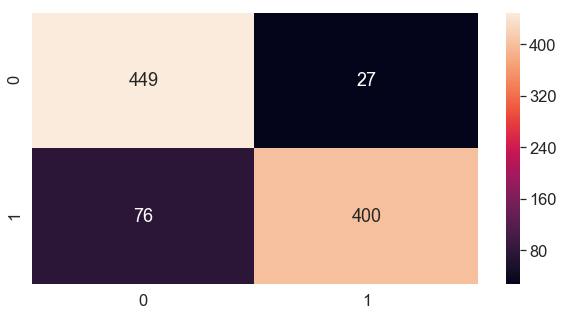

In [14]:
import plot as plot
cm=confusion_matrix(y_test,rf_pred)
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()



### Metricas Report: Random Forest

In [15]:
print ("{0}".format(metrics.classification_report(y_test, rf_pred, labels=[0, 1])))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       476
           1       0.94      0.84      0.89       476

    accuracy                           0.89       952
   macro avg       0.90      0.89      0.89       952
weighted avg       0.90      0.89      0.89       952



---
###  Curva ROC: Random Forest
Uma curva ROC é uma forma comumente usada para visualizar o desempenho de um classificador binário, significando um classificador com duas classes de saída possíveis. A curva plota a Taxa Positiva Real (Recall) contra a Taxa Falsa Positiva (também interpretada como Especificidade 1).

In [16]:
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [17]:
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_pred_prob)

In [18]:
def plot_roc_curve(fpr, tpr,nome='ROC'):
    plt.plot(fpr, tpr, color='red', label=nome)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falsos positivos')
    plt.ylabel('Taxa de verdadeiros positivos')
    plt.title('Curva ROC:Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

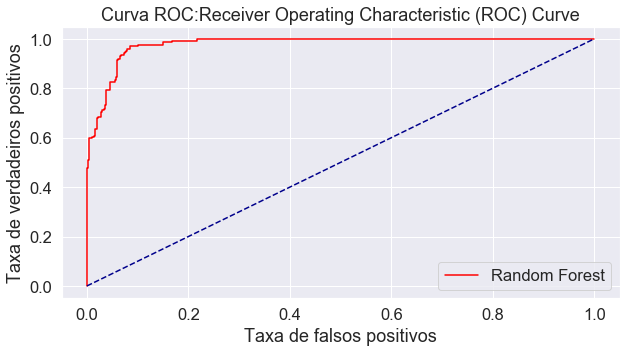

In [19]:
plot_roc_curve(rf_fpr, rf_tpr,'Random Forest')

---

###  AUC (área sob a curva) da Curva ROC : Random Forest
AUC ou Area Under the Curve é a porcentagem do gráfico do ROC que está abaixo da curva. AUC é útil como um único número de resumo do desempenho do classificador.

In [20]:
print(roc_auc_score(y_test, rf_pred_prob))
RF_Auc=roc_auc_score(y_test, rf_pred_prob)

0.9785767248075701


In [21]:
dfAuc = pandas.DataFrame(RF_Auc, index = ['AUC'], columns = ['resultado'] )
dfAuc

,resultado
AUC,0.978577


In [22]:
print(dfAuc)

     resultado
AUC   0.978577


---
---
---
---
---

# 3) carregando o modelo  Máquina de vetores de suporte SVM

In [23]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=45, random_state=2 ,probability=True,coef0=0.3)

#kernel='linear'

### Treinamento e teste do modelo: SVM.

In [24]:

svm_model.fit(X_train, y_train)


SVC(C=45, cache_size=200, class_weight=None, coef0=0.3,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=2,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
svm_pred = svm_model.predict(X_train)


---

##  Modelo de avaliação de métricas.

### Precisão Geral (Accuracy): SVM

In [26]:
print(f"accuracy score: {accuracy_score(y_train, svm_pred):.4f}\n")
svm_accuracy_testdata = accuracy_score(y_train, svm_pred)

accuracy score: 0.9887



### Matriz de confusão: SVM

In [27]:
print(f"accuracy score: {accuracy_score(y_train, svm_pred):.4f}\n")

print(f"Confusion Matrix: \n {confusion_matrix(y_train, svm_model.predict(X_train))}\n")


accuracy score: 0.9887

Confusion Matrix: 
 [[1105    3]
 [  22 1086]]



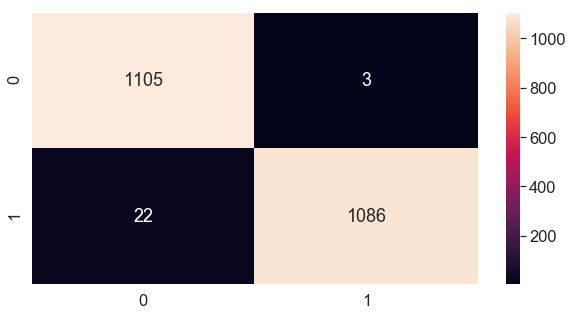

In [28]:
import plot as plot
cm=confusion_matrix(y_train, svm_model.predict(X_train))
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

### Metricas Report: svm

In [29]:
print(f"Classification Report: \n \tPrecision: {precision_score(y_train, svm_pred)}\n\tRecall Score: {recall_score(y_train,svm_pred)}\n\tF1 score: {f1_score(y_train, svm_pred)}\n")


Classification Report: 
 	Precision: 0.9972451790633609
	Recall Score: 0.98014440433213
	F1 score: 0.9886208466090123



---
###  Curva ROC: SVM


In [30]:
svm_pred_prob = svm_model.predict_proba(X_test)[:, 1]


In [31]:
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_pred_prob)

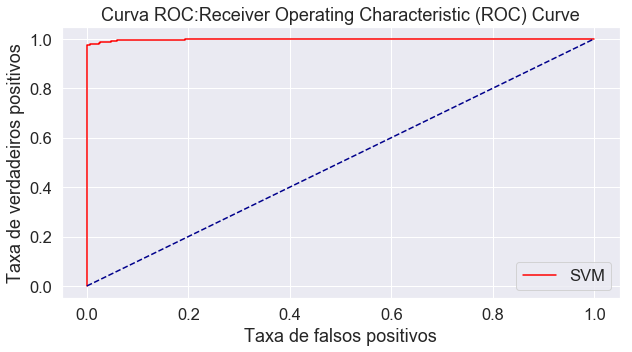

In [32]:
plot_roc_curve(svm_fpr, svm_tpr,'SVM')

---

###  AUC (área sob a curva) da Curva ROC : SVM
AUC ou Area Under the Curve é a porcentagem do gráfico do ROC que está abaixo da curva. AUC é útil como um único número de resumo do desempenho do classificador.

In [33]:
print(roc_auc_score(y_test, svm_pred_prob))
SVM_Auc=roc_auc_score(y_test, svm_pred_prob)

0.9981772120612952


---
---
---
---
---

# 4) carregando o modelo  Máquina de Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()



### Treinamento e teste do modelo: NB.

In [35]:
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
nb_pred = svm_model.predict(X_train)

##  Modelo de avaliação de métricas. NB.

### Precisão Geral (Accuracy): NB.

In [37]:
#get accuracy
print(f"accuracy score: {accuracy_score(y_train, nb_pred):.4f}\n")
nb_accuracy_testdata = accuracy_score(y_train, nb_pred)

accuracy score: 0.9887



### Matriz de confusão: NB.

In [38]:
print(f"Confusion Matrix: \n {confusion_matrix(y_train, nb_model.predict(X_train))}\n")

Confusion Matrix: 
 [[1011   97]
 [ 112  996]]



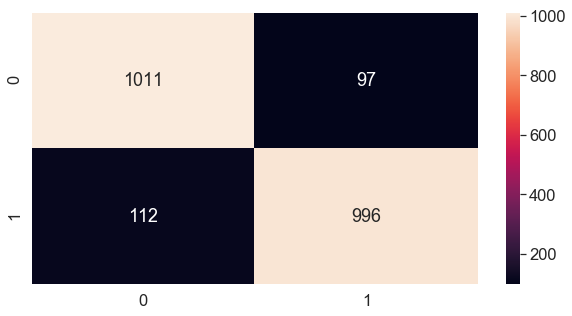

In [39]:
import plot as plot
cm=confusion_matrix(y_train, nb_model.predict(X_train))
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

### Metricas Report: NB.

In [40]:
print(f"Classification Report: \n \tPrecision: {precision_score(y_train, nb_pred)}\n\tRecall Score: {recall_score(y_train,nb_pred)}\n\tF1 score: {f1_score(y_train, nb_pred)}\n")


Classification Report: 
 	Precision: 0.9972451790633609
	Recall Score: 0.98014440433213
	F1 score: 0.9886208466090123



---
###  Curva ROC: NB.

In [51]:
nb_pred_prob = nb_model.predict_proba(X_test)[:, 1]

In [52]:
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, nb_pred_prob)

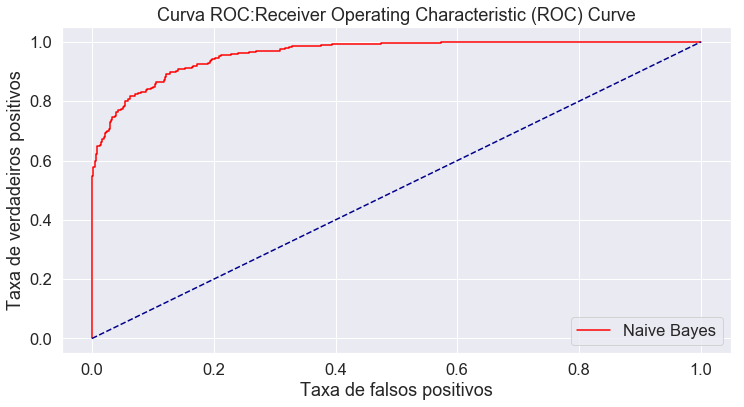

In [53]:
plot_roc_curve(nb_fpr, nb_tpr,'Naive Bayes')

###  AUC (área sob a curva) da Curva ROC : NB.

In [54]:
print(roc_auc_score(y_test, nb_pred_prob))
NB_Auc=roc_auc_score(y_test, nb_pred_prob)

0.9599516277099075


---
---
---
---
---
---
---

# Comparativo entre os modelos

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
#sns.set('talk', 'whitegrid', 'dark', font_scale=1.5, font='Ricty',   rc={"lines.linewidth": 2, 'grid.linestyle': '--'})



### Carregar  o modelo de Árvore Decisão


In [56]:
filename = '.\\baseDados\\cart.jss'
infile = open(filename,'rb')
cart_dict = pickle.load(infile)
infile.close()
CART_auc= cart_dict['RF_Auc']
CART_pred_prob= cart_dict['rf_pred_prob']

In [57]:
#print(cart_dict)
cart_fpr, cart_tpr, thresholds = roc_curve(y_test, CART_pred_prob)

### Carregar  o modelo de Regressão logística

In [58]:
filenamerl = '.\\baseDados\\regressaologitica.jss'
infile = open(filenamerl,'rb')
rlog_dict = pickle.load(infile)
infile.close()
#print(rlog_dict)
rlog_auc= rlog_dict['Auc']
rlog_pred_prob= rlog_dict['y_pred_prob']

In [59]:
rlog_fpr, rlog_tpr, thresholds = roc_curve(y_test, rlog_pred_prob)

## Mostra o gráfico comparativo

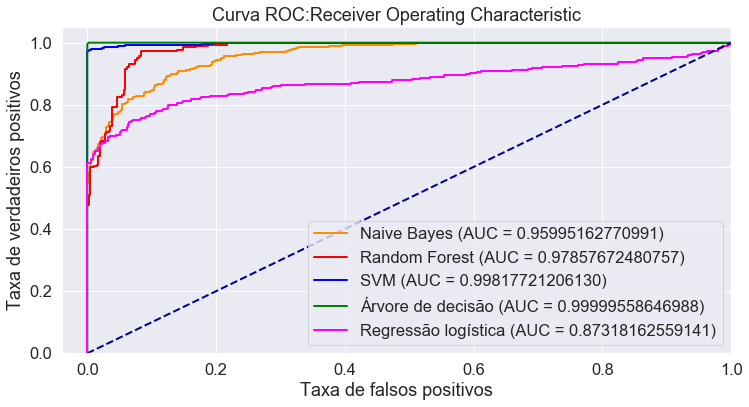

In [60]:
lw = 2
plt.figure()
plt.rcParams['figure.figsize'] = (12,6)



plt.plot(nb_fpr, nb_tpr, color='darkorange',  lw=lw, label='Naive Bayes (AUC = %0.14f)' % NB_Auc)
plt.plot(rf_fpr, rf_tpr , color='red',  lw=lw, label='Random Forest (AUC = %0.14f)' % RF_Auc)
plt.plot(svm_fpr, svm_tpr , color='blue',  lw=lw, label='SVM (AUC = %0.14f)' % SVM_Auc)
plt.plot(cart_fpr, cart_tpr , color='green',  lw=lw, label='Árvore de decisão (AUC = %0.14f)' % CART_auc)
plt.plot(rlog_fpr, rlog_tpr , color='magenta',  lw=lw, label='Regressão logística (AUC = %0.14f)' % rlog_auc)


#------------ linha central-----------------------------
plt.plot([0, 1], [0, 1], color='darkblue',lw=lw, linestyle='--')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC:Receiver Operating Characteristic')


sb.set(font_scale=1.5)
plt.legend()
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])


plt.show()
plt.savefig('roc_auc.png')
plt.close()

In [61]:
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

<Figure size 864x432 with 0 Axes>

---
---
---
---
---
---

# Fim da avaliação do modelo.